# PART 3: Advanced Python, Monte Carlo Simulations and Value-at-Risk (VaR) 

## Monte Carlo Simulations / Value-at-Risk (VaR)

### Analyzing the Data / past Performance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
np.set_printoptions(precision=4, suppress= True)

In [2]:
sp_returns = np.loadtxt("sp_returns2.csv", delimiter = ",", usecols = 1)

In [3]:
sp_returns

array([ 0.0012, -0.0061,  0.0022, ...,  0.0086, -0.0012,  0.0085])

In [4]:
sp_returns.size

3019

In [5]:
sp_returns.mean()

0.000267148957332019

In [6]:
sp_returns.std()

0.012484905249216954

In [7]:
x = np.linspace(-0.1, 0.1, 1000)

In [8]:
y = stats.norm.pdf(x, loc = sp_returns.mean(), scale = sp_returns.std())

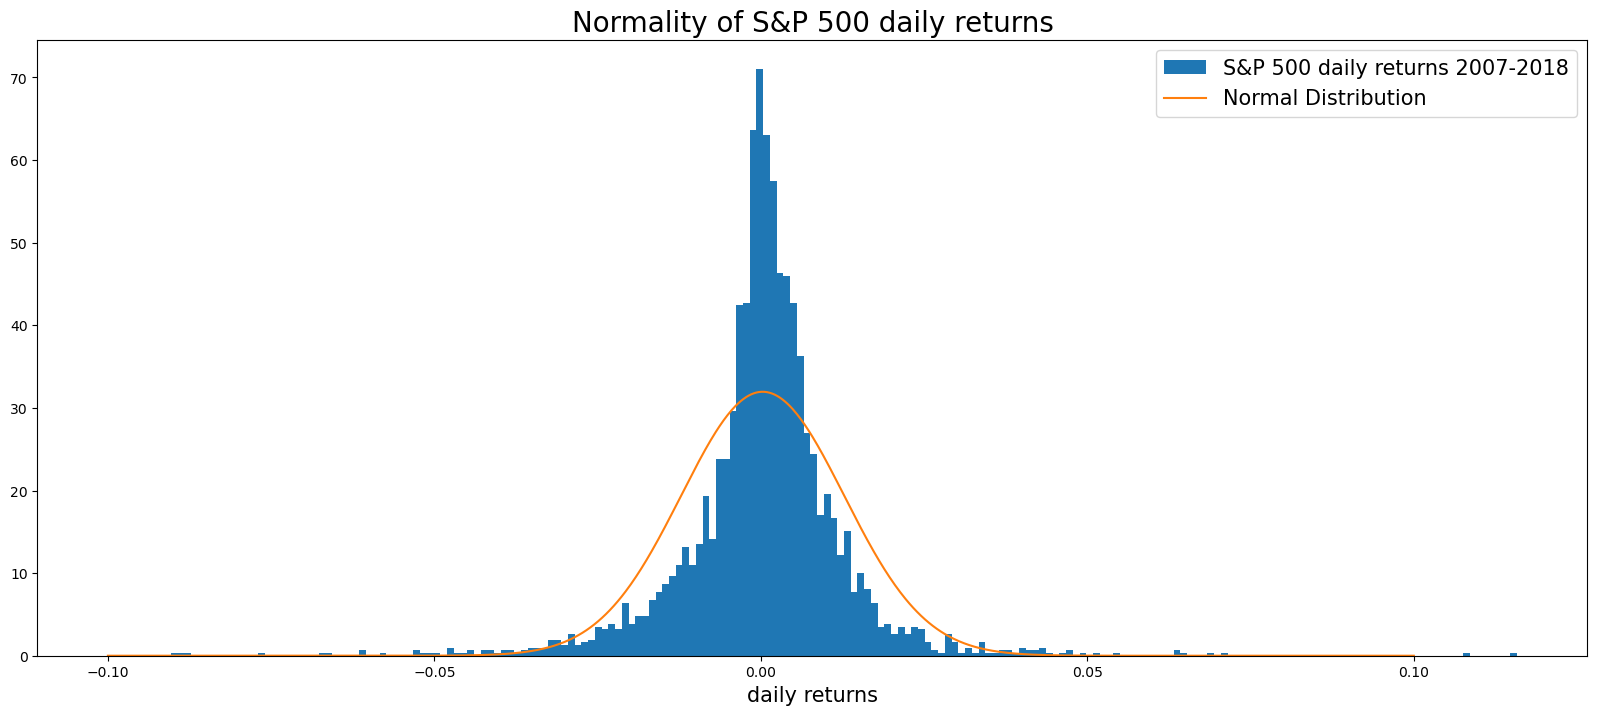

In [9]:
plt.figure(figsize = (20, 8))
plt.hist(sp_returns, density = True, bins = 200, label = "S&P 500 daily returns 2007-2018")
plt.plot(x, y, label = "Normal Distribution")
plt.title("Normality of S&P 500 daily returns", fontsize = 20)
plt.xlabel("daily returns",  fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [ ]:
stats.skew(sp_returns)

In [ ]:
stats.skewtest(sp_returns)

In [ ]:
stats.kurtosis(sp_returns)

In [ ]:
stats.kurtosistest(sp_returns)

In [ ]:
stats.normaltest(sp_returns)

### Value-at-Risk (VaR) - Parametric Method

The Investment Fund ABC currently has a __1,000,000 USD__ position in the __S&P 500 Index__. The Risk Manager of the Fund wants to estimate the __tail risk__ (extreme negative outcomes) of this position based on __historical data__ (and forecasts).<br><br>Calculate the __minimum loss__ over a __one-day period__ that will occur with __1%__ probability: __1% Value-at-Risk (VaR) of 1,000,000 USD over a one-day period__. Use the __parametric method__.

In [ ]:
import numpy as np
import scipy.stats as stats

In [ ]:
sp_returns = np.loadtxt("sp_returns2.csv", delimiter = ",", usecols = 1)

In [ ]:
sp_returns

In [ ]:
sp_returns.size

__1% VaR of 1,000,000 USD over a one-day period__

In [ ]:
I0 = 1000000
prob = 0.01

In [ ]:
mean = sp_returns.mean()
mean

In [ ]:
std = sp_returns.std()
std

In [ ]:
stats.norm.ppf(loc = mean, scale = std, q = prob)

In [ ]:
var_p = stats.norm.ppf(loc = mean, scale = std, q = prob) * I0
var_p

__Using daily mean return = 0%__

In [ ]:
stats.norm.ppf(loc = 0, scale = std, q = prob) * I0

__Using a mean return forecast__

In [ ]:
annual = -0.05

In [ ]:
daily = (1 + annual)**(1/252) - 1
daily

In [ ]:
stats.norm.ppf(loc = daily, scale = std, q = prob) * I0

### Value-at-Risk (VaR) - Historical Method

The Investment Fund ABC currently has a __1,000,000 USD__ position in the __S&P 500 Index__. The Risk Manager of the Fund wants to estimate the __tail risk__ (extreme negative outcomes) of this position based on __historical data__ (and forecasts).<br><br>Calculate the __minimum loss__ over a __one-day period__ that will occur with __1%__ probability: __1% Value-at-Risk (VaR) of 1,000,000 USD over a one-day period__. Use the __historical method__.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
sp_returns = np.loadtxt("sp_returns2.csv", delimiter = ",", usecols = 1)

In [ ]:
sp_returns.size

__1% VaR of 1,000,000 USD over a one-day period__

In [ ]:
I0 = 1000000
prob = 0.01

In [ ]:
plt.figure(figsize = (20, 8))
plt.hist(sp_returns, density = True, bins = 200, label = "S&P 500 daily returns 2007-2018")
plt.title("S&P 500 daily returns", fontsize = 20)
plt.xlabel("daily returns",  fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [ ]:
np.percentile(sp_returns, prob * 100)

In [ ]:
var_h = np.percentile(sp_returns, prob * 100) * I0
var_h

### Monte Carlo Simulation - Parametric Method (Part 1)

The Investment Fund ABC currently has a __1,000,000 USD__ position in the __S&P 500 Index__. The Risk Manager of the Fund wants to estimate the __tail risk__ (extreme negative outcomes) of this position based on __historical data__ (and forecasts).<br><br>Simulate the __minimum loss__ over a __period of one quarter__ that will occur with __1%__ probability: __1% Value-at-Risk (VaR) of 1,000,000 USD over a period of one quarter (63 business days)__. Use the __parametric method__.

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, suppress= True)

In [ ]:
sp_returns = np.loadtxt("sp_returns2.csv", delimiter = ",", usecols = 1)

In [ ]:
sp_returns

In [ ]:
mean = sp_returns.mean()
mean

In [ ]:
std = sp_returns.std()
mean

In [ ]:
I0 = 100
size = int(252 / 4)

In [ ]:
size

__one simulation / path__

In [ ]:
np.random.seed(123)
ret = np.random.normal(loc = mean, scale = std, size = size)
ret

In [ ]:
path = (ret + 1).cumprod() * I0
path

In [ ]:
path = np.insert(path, 0, I0)

In [ ]:
path

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(path)
plt.xlabel("Days", fontsize = 13)
plt.ylabel("Portfolio Value", fontsize = 13)
plt.show()

### Monte Carlo Simulation - Parametric Method (Part 2)

__many simulations / path__

In [ ]:
sims = 10000
days = 63

In [ ]:
np.random.seed(123)
ret = np.random.normal(loc = mean, scale = std, size = days * sims).reshape(sims, days)

In [ ]:
ret#.shape

In [ ]:
paths = (ret + 1).cumprod(axis = 1) * I0

In [ ]:
paths

In [ ]:
paths = np.hstack((np.ones(sims).reshape(sims, 1)*100, paths))
paths

In [ ]:
def path_simul_param(daily_returns, days, I0, sims = 10000, seed = 123):
    
    mean = np.mean(daily_returns)
    std = np.std(daily_returns)
    days = int(days)
    
    np.random.seed(seed)
    ret = np.random.normal(loc = mean, scale = std, size = days * sims).reshape(sims, days)
    
    paths = (ret + 1).cumprod(axis = 1) * I0
    paths = np.hstack((np.ones(sims).reshape(sims, 1) * I0, paths))
    return paths

In [ ]:
paths = path_simul_param(daily_returns = sp_returns, days =  63, I0 = 100)

In [ ]:
paths

In [ ]:
paths.shape

In [ ]:
plt.figure(figsize = (20, 12))
plt.plot(paths.T)
plt.ylabel("Portfolio Value", fontsize = 15)
plt.xlabel("Days", fontsize = 15 )
plt.title("Monte Carlo Simulation - Parametric", fontsize = 20)
plt.show()

In [ ]:
plt.figure(figsize = (20, 12))
plt.hist(paths[:, -1], bins = 100)
plt.title("Portfolio Value in one quarter - Frequency Distribution", fontsize = 20)
plt.xlabel("Portfolio Value", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.show()

### Monte Carlo Simulation - Parametric Method (Part 3)

In [ ]:
sims = 1000000
I0 = 1000000

In [ ]:
paths = path_simul_param(sp_returns, days = 63, I0 = I0, sims = sims) 

In [ ]:
paths.shape

In [ ]:
final_p = paths[:, -1]

In [ ]:
plt.figure(figsize = (20, 12))
plt.hist(final_p, bins = 1000, density = True)
plt.title("Portfolio Value in one quarter", fontsize = 20)
plt.xlabel("Portfolio Value", fontsize = 15)
plt.ylabel("pdf", fontsize = 15)
plt.show()

In [ ]:
final_p.mean()

In [ ]:
np.median(final_p)

In [ ]:
final_p.std()

In [ ]:
stats.skew(final_p)

__1% Value-at-Risk (VaR) of 1,000,000 USD over a period of one quarter__

In [ ]:
prob = 0.01

In [ ]:
np.percentile(final_p, prob * 100)

In [ ]:
np.percentile(final_p, prob * 100) - I0

In [ ]:
def var_param(daily_returns, days, prob, I0, sims = 10000, seed = 123):
    
    mean = np.mean(daily_returns)
    std = np.std(daily_returns)
    days = int(days)
    
    np.random.seed(seed)
    ret = np.random.normal(loc = mean, scale = std, size = days * sims).reshape(sims, days)
    
    final = (ret + 1).prod(axis = 1) * I0
    var = np.percentile(final, prob) - I0
    
    return var 

In [ ]:
var_param(sp_returns, days = 1, prob = 1, I0 = 1000000, sims = 1000000)

In [ ]:
var_param(sp_returns, days = 63, prob = 1, I0 = 1000000, sims = 1000000)

In [ ]:
var_p1= []
for i in range(1, 252+1):
    var_p1.append(-var_param(sp_returns, days = i, prob = 1, I0 = 1000000))

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(range(1, 252+1), var_p1)
plt.title("1% VAR for USD 1,000,000", fontsize = 20)
plt.xlabel("Period (in days)", fontsize = 15)
plt.ylabel("VaR", fontsize = 15)
plt.show()

In [ ]:
var_p2= []
for i in np.linspace(0.1, 5, 100):
    var_p2.append(-var_param(sp_returns, days = 63, prob = i, I0 = 1000000))

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(np.linspace(0.1, 5, 100),var_p2)
plt.title("1% VAR for USD 1,000,000")
plt.title("Quarterly VAR for USD 1,000,000", fontsize = 20)
plt.xlabel("Probability (in%)", fontsize = 15)
plt.ylabel("VaR", fontsize = 15)
plt.show()

### Monte Carlo Simulation - Bootstrapping Method (Part 1)

The Investment Fund ABC currently has a __1,000,000 USD__ position in the __S&P 500 Index__. The Risk Manager of the Fund wants to estimate the __tail risk__ (extreme negative outcomes) of this position based on __historical data__ (and forecasts).<br><br>Simulate the __minimum loss__ over a __period of one quarter__ that will occur with __1%__ probability: __1% Value-at-Risk (VaR) of 1,000,000 USD over a period of one quarter (63 business days)__. Use the __bootstrapping method__.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
sp_returns = np.loadtxt("sp_returns2.csv", delimiter = ",", usecols = 1)

In [ ]:
sp_returns

In [ ]:
sp_returns.size

In [ ]:
I0 = 100
sims = 10000
days = 63

In [ ]:
def path_simul_bootstr(daily_returns, days, I0, sims = 10000, seed = 123):
    
    days = int(days)
    
    np.random.seed(seed)
    ret = np.random.choice(daily_returns, size = days * sims, replace = True).reshape(sims, days)
    
    paths = (ret + 1).cumprod(axis = 1) * I0
    paths = np.hstack((np.ones(sims).reshape(sims, 1) * I0, paths))
    
    return paths

In [ ]:
paths = path_simul_bootstr(sp_returns, days = days, I0 = I0, sims = sims)
paths

In [ ]:
paths.shape

In [ ]:
plt.figure(figsize = (20, 12))
plt.plot(paths.T)
plt.ylabel("Portfolio Value", fontsize = 15)
plt.xlabel("Days", fontsize = 15 )
plt.title("Monte Carlo Simulation - Bootstrapping", fontsize = 20)
plt.show()

In [ ]:
sims = 1000000
I0 = 1000000
days = 63

In [ ]:
paths = path_simul_bootstr(sp_returns, days = days, I0 = I0, sims = sims)

In [ ]:
final_b = paths[:, -1]

In [ ]:
plt.figure(figsize = (20, 12))
plt.hist(final_p, bins = 1000, density = True, alpha = 0.5, color = "r")
plt.hist(final_b, bins = 1000, density = True, alpha = 0.5, color = "b")
plt.show()

In [ ]:
final_b.mean()

In [ ]:
np.median(final_b)

In [ ]:
final_b.std()

In [ ]:
stats.skew(final_b)

### Monte Carlo Simulation - Bootstrapping Method (Part 2)

__1% Value-at-Risk (VaR) of 1,000,000 USD over a period of one quarter__

In [ ]:
I0 = 1000000
prob = 0.01

In [ ]:
final_b

In [ ]:
final_b.size

In [ ]:
np.percentile(final_b, prob * 100) - I0

In [ ]:
np.percentile(final_p, prob * 100) - I0

In [ ]:
def var_bootstr(daily_returns, days, prob, I0, sims = 10000, seed = 123):
    
    days = int(days)
    
    np.random.seed(seed)
    ret = np.random.choice(daily_returns, size = days * sims, replace = True).reshape(sims, days)
    
    paths = (ret + 1).prod(axis = 1) * I0
    var = np.percentile(paths, prob) - I0
    
    return var 

In [ ]:
var_bootstr(sp_returns, days = 63, prob = 1, I0 = 1000000, sims = 1000000)

In [ ]:
var_b1= []
for i in range(1, 252+1):
    var_b1.append(-var_bootstr(sp_returns, days = i, prob = 1, I0 = 1000000))

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(range(1, 252+1), var_b1)
plt.title("1% VAR for USD 1,000,000", fontsize = 20)
plt.xlabel("Period (in days)", fontsize = 15)
plt.ylabel("VaR", fontsize = 15)
plt.show()

In [ ]:
var_b2= []
for i in np.linspace(0.1, 5, 100):
    var_b2.append(-var_bootstr(sp_returns, days = 63, prob = i, I0 = 1000000))

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(np.linspace(0.1, 5, 100),var_p2, label = "Parametric")
plt.plot(np.linspace(0.1, 5, 100),var_b2, label = "Bootstrapping")
plt.title("1% VAR for USD 1,000,000")
plt.title("Quarterly VAR for USD 1,000,000", fontsize = 20)
plt.xlabel("Probability (in%)", fontsize = 15)
plt.ylabel("VaR", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

### Conditional Value-at-Risk (CVAR)

The Investment Fund ABC currently has a __1,000,000 USD__ position in the S&P 500 Index. The Risk Manager of the Fund wants to estimate the __tail risk__ (extreme negative outcomes) of this position based on historical data (and forecasts).<br><br>
__Simulate__ the __conditional expected loss__ over a period of __one quarter__ that will occur with __1% probability__.<br>
Use and compare __Parametric__ simulation & __Bootstrapping__ simulation


In [ ]:
prob = 0.01

In [ ]:
final_p

In [ ]:
np.percentile(final_p, prob * 100)

In [ ]:
np.percentile(final_p, prob * 100) - I0

In [ ]:
tail_p = final_p[final_p < np.percentile(final_p, prob * 100)]
tail_p

In [ ]:
tail_p.mean() - I0

In [ ]:
final_b

In [ ]:
np.percentile(final_b, prob * 100)

In [ ]:
np.percentile(final_b, prob * 100) - I0

In [ ]:
tail_b = final_b[final_b < np.percentile(final_b, prob * 100)]
tail_b

In [ ]:
tail_b.mean() - I0

### Dynamic & path-dependent Simulations (Part 1)

John (65) recently retired. He owns liquid assets worth __625,000 USD__ to cover life expenses during retirement. John´s bank offers to pay a fixed (guaranteed) monthly annuity of 2,635 USD for the next 30 years. 
Alternatively, John evaluates a diversified Investment Portfolio with an expected long-term __return of 0.5% per month__ with a monthly __standard deviation of 2.5%__ (assume normality). John plans to withdraw __2,800 USD per month__. 

Simulate/Calculate the __risk of outliving his assets__ prior to his 95th birthday (longevity risk). 

Formulate and simulate an appropriate __path-dependent strategy__ that 1) __lowers longevity risk to 10%__ or less, and, at the same time 2) __further increases expected income__.

In [ ]:
import numpy as np
import numpy_financial as npf # NEW!!!
import matplotlib.pyplot as plt

__Alt 1: The Annuity Offer (Bank)__

In [ ]:
n = 30
m = 12
r = 0.03
pv = 625000

In [ ]:
npf.pmt(rate = r/m, nper = n*m, fv = 0, pv = - pv, when = "end")

__Alt 2: The Investment Portfolio__

In [ ]:
mean_ret = 0.06/12
std = 0.025

In [ ]:
annuity = 2800

In [ ]:
np.random.seed(120)
ret = np.random.normal(loc = mean_ret, scale = std, size = 1)  
ret

In [ ]:
pv * (1 + ret) - annuity

In [ ]:
np.random.seed(123)
rets = np.random.normal(loc = mean_ret, scale = std, size = n*m)    

value_list = [pv]
for i in range(n*m):
    value = max(0, value_list[i] * (1 + rets[i]) - annuity)
    value_list.append(value)

In [ ]:
value_list

In [ ]:
len(value_list)

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(value_list)
plt.grid()
plt.title("Portfolio Size during Retirement (Sims = 1)", fontsize = 15)
plt.ylabel("Portfolio Size", fontsize = 12)
plt.xlabel("Term (in months)", fontsize = 12)
plt.show()

### Dynamic & path-dependent Simulations (Part 2)

In [ ]:
sims = 20

In [ ]:
sims_array = np.empty(sims * (n * m + 1)).reshape(sims, (n * m + 1))
sims_array.shape

In [ ]:
sims_array = np.empty(sims * (n * m + 1)).reshape(sims, n * m + 1)
np.random.seed(123)

for sim in range(sims):
    rets = np.random.normal(loc = mean_ret, scale = std, size = n*m)    
    value_list = [pv]
    
    for i in range(n*m):
        value = max(0, value_list[i] * (1 + rets[i]) - annuity)
        value_list.append(value)
    
    sims_array[sim, :] = value_list

In [ ]:
sims_array.shape

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(sims_array.T)
plt.grid()
plt.title("Portfolio Value during Retirement (Sims = {})".format(sims), fontsize = 15)
plt.ylabel("Portfolio Value", fontsize = 12)
plt.xlabel("Term (in months)", fontsize = 12)
plt.show()

In [ ]:
plt.figure(figsize = (12, 8))
plt.hist(sims_array[:, -1], bins= 300)
plt.grid()
plt.title("Portfolio Value at age = 95", fontsize = 15)
plt.xlabel("Portfolio Value", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.show()

In [ ]:
(sims_array[:, -1] == 0).sum() / sims

In [ ]:
def outliving_risk(assets, nper, annuity, mean_ret, std, sims = 10000, seed = 123):
    
    sims_array = np.empty(sims * (nper + 1)).reshape(sims, nper + 1)
    withdrawels = []
    np.random.seed(seed)
    
    for sim in range(sims):
        rets = np.random.normal(loc = mean_ret, scale = std, size = nper)    
        value_list = [assets]
    
        for i in range(nper):
            withdrawel = min(value_list[i] * (1 + rets[i]), annuity)
            withdrawels.append(withdrawel)
            value = value_list[i] * (1 + rets[i]) - withdrawel
            value_list.append(value)
    
        sims_array[sim, :] = value_list
    
    return (sims_array[:, -1] == 0).sum() / sims, np.mean(withdrawels)

In [ ]:
outliving_risk(assets = pv, nper = n*m, annuity = 2800, mean_ret = mean_ret, std = std, sims = 10000)

### Dynamic & path-dependent Simulations (Part 3)

In [ ]:
annuities = np.arange(2400, 3400, 10)
annuities

In [ ]:
risks = []
for i in annuities:
    risk = outliving_risk(assets = pv, nper = n*m, annuity = i,
                          mean_ret = mean_ret, std = std, sims = 1000)[0]
    risks.append(risk)

In [ ]:
risks

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(annuities, risks)
plt.grid()
plt.title("Outliving Risk vs. Annuity", fontsize = 15)
plt.ylabel("Risk of Outliving Portfolio Assets", fontsize = 12)
plt.xlabel("Annuity (per month)", fontsize = 12)
plt.show()

### Dynamic & path-dependent Simulations (Part 4)

Formulate and simulate an appropriate __path-dependent strategy__ that 1) lowers __longevity risk__ to __10% or less__, and, at the same time 2) further increases expected income. Assume an acceptable __minimum income of 2200 USD__ per month (reduced annuity).

Simple path-dependent Strategy: __Reduce__ withdrawels to 2200 USD, if current __portfolio value is below the target__ level.

How to calculate the target levels for the next 360 months (__idealized path__)? -> __Bank Annuity Plan__ (equivalent: Amortizing Loan Balances)

In [ ]:
import numpy as np
import numpy_financial as npf # NEW!
import matplotlib.pyplot as plt

In [ ]:
n = 30
m = 12
r = 0.03
pv = 625000

In [ ]:
annuity = npf.pmt(rate = r/m, nper = n*m, fv = 0, pv = - pv, when = "end")
annuity

In [ ]:
balances = npf.fv(r/m, nper = range(0, n*m + 1), pmt = annuity, pv = -pv)
balances

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(balances)
plt.grid()
plt.title("Amortizing Loan Balances", fontsize = 15)
plt.ylabel("Portfolio Value", fontsize = 12)
plt.xlabel("Term (in months)", fontsize = 12)
plt.show()

In [ ]:
mean_ret = 0.06/12
std = 0.025

In [ ]:
def outliving_risk(assets, nper, annuity, red_annuity, mean_ret, std, balances, sims = 10000, seed = 123):
    
    sims_array = np.empty(sims * (nper + 1)).reshape(sims, nper + 1)
    withdrawels = []
    np.random.seed(seed)
    
    for sim in range(sims):
        rets = np.random.normal(loc = mean_ret, scale = std, size = nper)    
        value_list = [assets]
    
        for i in range(nper):
            
            if value_list[i] < balances[i]:
                withdrawel =  min(value_list[i] * (1 + rets[i]), red_annuity)
            else:
                withdrawel = min(value_list[i] * (1 + rets[i]), annuity)
            
            withdrawels.append(withdrawel)
            value = value_list[i] * (1 + rets[i]) - withdrawel
            value_list.append(value)
    
        sims_array[sim, :] = value_list
    
    return (sims_array[:, -1] == 0).sum() / sims, np.mean(withdrawels), sims_array

In [ ]:
array = outliving_risk(assets = pv, nper = n*m, annuity = 2800, red_annuity = 2200,
                       mean_ret = mean_ret, std = std, balances = balances, sims = 20)[2]

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(balances)
plt.plot(array.T)
plt.grid()
plt.title("Amortizing Loan Balances", fontsize = 15)
plt.ylabel("Portfolio Value", fontsize = 12)
plt.xlabel("Term (in months)", fontsize = 12)
plt.show()

In [ ]:
outliving_risk(assets = pv, nper = n*m, annuity = 3250, red_annuity = 2200,
               mean_ret = mean_ret, std = std, balances = balances, sims = 10000)[:2]